# Wine Analysis

Because when there is a pandemic, we drink more.

## Background

I recently lost my job and I wanted to do a one-off data analytics project. Stock prices, COVID-19 supply chain, and number of patients recovered contended as noble applications of my time and effort. However, sitting here drinking the last few drops of my bottle of Chardonnay and getting emails from a Napa Valley winery trying to sell me a $70 bottle of Chardonnay (somehow knowing I'm out), I set out to answer a more pressing question in these troubling times: what wine should I buy next?

## Objective

In this project, I want to analyze the wine quality and the price.  Are wines from France really better than wines from South Africa? Is the 70 dollar California Chardonnay really worth more than the 10 dollar South African one?

## Analysis

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [308]:
# Read in values
wines = pd.read_csv("white-wine-price-rating.csv")

Even with a high paying tech job, I would never spend more than 250 dollars on a bottle of wine so the cut off for the data is $350 for the purpose of this model

In [309]:
wines = wines.where(wines.WinePrice < 350).dropna()
wines.Region.value_counts()

Burgundy                1558
Northern Italy           254
German                   240
Upper Loire Valley       198
Californian              196
Alsace                   187
Northern Rhône           183
South African            129
Bordeaux                 125
Loire                    109
Spanish                  101
Australian                95
New Zealand               77
Southern Rhône            76
Northern Portugal         72
Central Italy             66
Southern Italy            66
Napa Valley               61
Austrian                  52
Languedoc-Roussillon      42
Jura                      41
Argentinian               27
Greek Santorini           20
Portuguese                18
Southern Portugal         17
Italian                   17
Oregon                    14
Chilean                   10
Loire Muscadet             5
Canadian                   3
Greek                      1
 Chilean                   1
Name: Region, dtype: int64

# What type of Wine Should I Buy?

In [334]:
wine_variety = wines['RegionalVariety'].value_counts().head(10)

wine_region = wines['Region'].value_counts().head(10)
wine_variety

White                     1085
Côte de Beaune White       951
Chardonnay                 467
Riesling                   394
Chablis                    347
Chenin Blanc               163
Macônnais White            118
Condrieu                    98
Côte Chalonnaise White      61
Gewürztraminer              56
Name: RegionalVariety, dtype: int64

In [461]:
w1 = wines.where(wines.RegionalVariety == 'Chablis').dropna()
w2 = wines.where(wines.RegionalVariety == 'Côte de Beaune White').dropna()
w3 = wines.where(wines.RegionalVariety == 'Chardonnay').dropna()
w4 = wines.where(wines.RegionalVariety == 'Riesling').dropna()
w5 = wines.where(wines.RegionalVariety == 'Chenin Blanc').dropna()
w6 = wines.where(wines.RegionalVariety == 'White').dropna()

### Find Regression for Chablis

In [475]:
Y = w1.WineRating.values.reshape(-1,1)
X = w1.WinePrice.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=0)

X_train = X_train[np.logical_not(np.isnan(X_train))].reshape(-1,1)
X_test1 = X_test[np.logical_not(np.isnan(X_test))].reshape(-1,1)
y_train = y_train[np.logical_not(np.isnan(y_train))].reshape(-1,1)
y_test = y_test[np.logical_not(np.isnan(y_test))].reshape(-1,1)

model = sm.OLS(Y,X).fit()

sd1 = model.bse

#Find Regression
regressor1 = LinearRegression()  
regressor1.fit(X_train, y_train)
y_pred1 = regressor1.predict(X_test1)


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.610
Model:                            OLS   Adj. R-squared (uncentered):              0.609
Method:                 Least Squares   F-statistic:                              541.1
Date:                Thu, 16 Apr 2020   Prob (F-statistic):                    1.00e-72
Time:                        12:13:01   Log-Likelihood:                         -821.08
No. Observations:                 347   AIC:                                      1644.
Df Residuals:                     346   BIC:                                      1648.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0368      0.002     23.261      0.000       0.034       0.040
==============================================================================
Omnibus:                      153.656   Durbin-Watson:                   0.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              498.048
Skew:                          -2.075   Prob(JB):                    7.08e-109
Kurtosis:                       7.150   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Côte de Beaune White

In [474]:
Y = w2.WineRating.values.reshape(-1,1)
X = w2.WinePrice.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=0)

X_train = X_train[np.logical_not(np.isnan(X_train))].reshape(-1,1)
X_test2 = X_test[np.logical_not(np.isnan(X_test))].reshape(-1,1)
y_train = y_train[np.logical_not(np.isnan(y_train))].reshape(-1,1)
y_test = y_test[np.logical_not(np.isnan(y_test))].reshape(-1,1)

model = sm.OLS(Y,X).fit()

sd2 = model.bse

#Find Regression
regressor2 = LinearRegression()  
regressor2.fit(X_train, y_train)
y_pred2 = regressor2.predict(X_test2)


model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.695
Model:                            OLS   Adj. R-squared (uncentered):              0.695
Method:                 Least Squares   F-statistic:                              2164.
Date:                Thu, 16 Apr 2020   Prob (F-statistic):                   3.86e-247
Time:                        12:12:39   Log-Likelihood:                         -2155.6
No. Observations:                 951   AIC:                                      4313.
Df Residuals:                     950   BIC:                                      4318.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0322      0.001     46.518      0.000       0.031       0.034
==============================================================================
Omnibus:                      281.443   Durbin-Watson:                   0.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              635.063
Skew:                          -1.635   Prob(JB):                    1.25e-138
Kurtosis:                       5.310   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Chardonnay

In [473]:
Y = w3.WineRating.values.reshape(-1,1)
X = w3.WinePrice.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=0)

X_train = X_train[np.logical_not(np.isnan(X_train))].reshape(-1,1)
X_test3 = X_test[np.logical_not(np.isnan(X_test))].reshape(-1,1)
y_train = y_train[np.logical_not(np.isnan(y_train))].reshape(-1,1)
y_test = y_test[np.logical_not(np.isnan(y_test))].reshape(-1,1)

model = sm.OLS(Y,X).fit()

sd3 = model.bse


#Find Regression
regressor3 = LinearRegression()  
regressor3.fit(X_train, y_train)
y_pred3 = regressor3.predict(X_test3)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.629
Model:                            OLS   Adj. R-squared (uncentered):              0.628
Method:                 Least Squares   F-statistic:                              789.1
Date:                Thu, 16 Apr 2020   Prob (F-statistic):                   2.56e-102
Time:                        12:12:33   Log-Likelihood:                         -1099.2
No. Observations:                 467   AIC:                                      2200.
Df Residuals:                     466   BIC:                                      2204.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0410      0.001     28.091      0.000       0.038       0.044
==============================================================================
Omnibus:                      225.043   Durbin-Watson:                   0.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              923.106
Skew:                          -2.232   Prob(JB):                    3.55e-201
Kurtosis:                       8.246   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Riesling

In [472]:
Y = w4.WineRating.values.reshape(-1,1)
X = w4.WinePrice.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=0)

X_train = X_train[np.logical_not(np.isnan(X_train))].reshape(-1,1)
X_test4 = X_test[np.logical_not(np.isnan(X_test))].reshape(-1,1)
y_train = y_train[np.logical_not(np.isnan(y_train))].reshape(-1,1)
y_test = y_test[np.logical_not(np.isnan(y_test))].reshape(-1,1)

model = sm.OLS(Y,X).fit()

sd4 = model.bse

#Find Regression
regressor4 = LinearRegression()  
regressor4.fit(X_train, y_train)
y_pred4 = regressor4.predict(X_test4)



model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.603
Model:                            OLS   Adj. R-squared (uncentered):              0.602
Method:                 Least Squares   F-statistic:                              596.7
Date:                Thu, 16 Apr 2020   Prob (F-statistic):                    7.92e-81
Time:                        12:12:29   Log-Likelihood:                         -937.84
No. Observations:                 394   AIC:                                      1878.
Df Residuals:                     393   BIC:                                      1882.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0483      0.002     24.427      0.000       0.044       0.052
==============================================================================
Omnibus:                      309.232   Durbin-Watson:                   0.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3653.486
Skew:                          -3.434   Prob(JB):                         0.00
Kurtosis:                      16.243   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Chenin Blanc

In [471]:
Y = w5.WineRating.values.reshape(-1,1)
X = w5.WinePrice.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=0)

X_train = X_train[np.logical_not(np.isnan(X_train))].reshape(-1,1)
X_test5 = X_test[np.logical_not(np.isnan(X_test))].reshape(-1,1)
y_train = y_train[np.logical_not(np.isnan(y_train))].reshape(-1,1)
y_test = y_test[np.logical_not(np.isnan(y_test))].reshape(-1,1)

model = sm.OLS(Y,X).fit()

sd5 = model.bse

#Find Regression
regressor5 = LinearRegression()  
regressor5.fit(X_train, y_train)
y_pred5 = regressor5.predict(X_test5)


model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.608
Model:                            OLS   Adj. R-squared (uncentered):              0.606
Method:                 Least Squares   F-statistic:                              251.6
Date:                Thu, 16 Apr 2020   Prob (F-statistic):                    8.51e-35
Time:                        12:12:23   Log-Likelihood:                         -385.80
No. Observations:                 163   AIC:                                      773.6
Df Residuals:                     162   BIC:                                      776.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0547      0.003     15.862      0.000       0.048       0.061
==============================================================================
Omnibus:                      117.474   Durbin-Watson:                   0.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              673.424
Skew:                          -2.861   Prob(JB):                    5.86e-147
Kurtosis:                      11.150   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### White

In [467]:
Y = w6.WineRating.values.reshape(-1,1)
X = w6.WinePrice.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=0)

X_train = X_train[np.logical_not(np.isnan(X_train))].reshape(-1,1)
X_test6 = X_test[np.logical_not(np.isnan(X_test))].reshape(-1,1)
y_train = y_train[np.logical_not(np.isnan(y_train))].reshape(-1,1)
y_test = y_test[np.logical_not(np.isnan(y_test))].reshape(-1,1)

model = sm.OLS(Y,X).fit()
sd6 = model.bse

#Find Regression
regressor6 = LinearRegression()  
regressor6.fit(X_train, y_train)
y_pred6 = regressor6.predict(X_test6)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.550
Model:                            OLS   Adj. R-squared (uncentered):              0.550
Method:                 Least Squares   F-statistic:                              1327.
Date:                Thu, 16 Apr 2020   Prob (F-statistic):                   2.14e-190
Time:                        12:11:25   Log-Likelihood:                         -2643.6
No. Observations:                1085   AIC:                                      5289.
Df Residuals:                    1084   BIC:                                      5294.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0374      0.001     36.431      0.000       0.035       0.039
==============================================================================
Omnibus:                      556.653   Durbin-Watson:                   0.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2882.588
Skew:                          -2.438   Prob(JB):                         0.00
Kurtosis:                       9.324   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plot Price vs Rating w/ Regressions

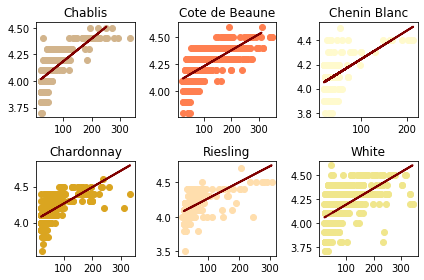

In [468]:

figure.tight_layout()
figure, axes = plt.subplots(nrows=2, ncols=3)

axes[0,0].scatter(w1.WinePrice, w1.WineRating, color = 'tan')
axes[0,0].plot(X_test1, y_pred1, color='maroon', linewidth=2)
axes[0,0].set_title('Chablis')

axes[0,1].scatter(w2.WinePrice, w2.WineRating, color = 'coral')
axes[0,1].plot(X_test2, y_pred2, color='maroon', linewidth=2)
axes[0,1].set_title('Cote de Beaune')

axes[0,2].scatter(w5.WinePrice, w5.WineRating, color = 'lemonchiffon')
axes[0,2].plot(X_test5, y_pred5, color='maroon', linewidth=2)
axes[0,2].set_title('Chenin Blanc')

axes[1,0].scatter(w3.WinePrice, w3.WineRating, color = 'goldenrod')
axes[1,0].plot(X_test3, y_pred3, color='maroon', linewidth=2)
axes[1,0].set_title('Chardonnay')

axes[1,1].scatter(w4.WinePrice, w4.WineRating, color = 'navajowhite')
axes[1,1].plot(X_test4, y_pred4, color='maroon', linewidth=2)
axes[1,1].set_title('Riesling')

axes[1,2].scatter(w6.WinePrice, w6.WineRating, color = 'khaki')
axes[1,2].plot(X_test6, y_pred6, color='maroon', linewidth=2)
axes[1,2].set_title('White')

figure.tight_layout()




### How much should I spend on a good bottle of wine?

Looking at the charts and regression lines, I am more inclined to pay a little bit more for that bottle of Riesling or Chenin Blanc, but Cote de Beaune? The price does not seem to make as much of a difference in the quality of the wine. 

Chablis: [0.02125654] increase in rating per $10 increase in price
Chablis Average Cost: $66.69332853025941
Chablis Average Rating: 4.125648414985599

Cote de Beaune: [0.01470393] increase in rating per $10 increase in price
Cote de Beaune Average Cost: $89.99590956887502
Cote de Beaune Average Rating: 4.224079915877983

Chardonnay: [0.02285003] increase in rating per $10 increase in price
Chardonnay Average Cost: $62.80698072805164
Chardonnay Average Rating: 4.17580299785867

Riesling: [0.02314767] increase in rating per $10 increase in price
Riesling Average Cost: $51.005177664974724
Riesling Average Rating: 4.147208121827412

Chenin Blanc: [0.02374609] increase in rating per $10 increase in price
Chenin Blanc Average Cost: $45.09395705521467
Chenin Blanc Average Rating: 4.120245398773008

White: [0.01685195] increase in rating per $10 increase in price
White Average Cost: $59.39418433179715
White Average Rating: 4.122672811059884/


/Users/alessandracoote/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


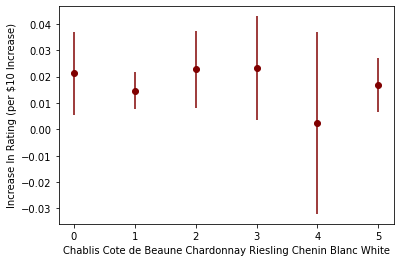

In [480]:
coef1 = regressor1.coef_[0].astype(float)*10
print(f"Chablis: {regressor1.coef_[0]*10} increase in rating per $10 increase in price")
mean1 = w1.WinePrice.mean()
print(f"Chablis Average Cost: ${mean1}")
rate1 = w1.WineRating.mean()
print(f"Chablis Average Rating: {rate1}")

coef2 = regressor2.coef_[0].astype(float)*10
print(f"\nCote de Beaune: {regressor2.coef_[0]*10} increase in rating per $10 increase in price")
mean2 = w2.WinePrice.mean()
print(f"Cote de Beaune Average Cost: ${mean2}")
rate2 = w2.WineRating.mean()
print(f"Cote de Beaune Average Rating: {rate2}")


coef3 = regressor3.coef_[0].astype(float)*10
print(f"\nChardonnay: {regressor3.coef_[0]*10} increase in rating per $10 increase in price")
mean3 = w3.WinePrice.mean()
print(f"Chardonnay Average Cost: ${mean3}")
rate3 = w3.WineRating.mean()
print(f"Chardonnay Average Rating: {rate3}")


coef4 = regressor4.coef_[0].astype(float)*10
print(f"\nRiesling: {regressor4.coef_[0]*10} increase in rating per $10 increase in price")
mean4 = w4.WinePrice.mean()
print(f"Riesling Average Cost: ${mean4}")
rate4 = w4.WineRating.mean()
print(f"Riesling Average Rating: {rate4}")

coef5 = regressor5.coef_[0]*1
print(f"\nChenin Blanc: {regressor5.coef_[0]*10} increase in rating per $10 increase in price")
mean5 = w5.WinePrice.mean()
print(f"Chenin Blanc Average Cost: ${mean5}")
rate5 = w5.WineRating.mean()
print(f"Chenin Blanc Average Rating: {rate5}")

coef6 = regressor6.coef_[0].astype(float)*10
print(f"\nWhite: {regressor6.coef_[0]*10} increase in rating per $10 increase in price")
mean6 = w6.WinePrice.mean()
print(f"White Average Cost: ${mean6}")
rate6 = w6.WineRating.mean()
print(f"White Average Rating: {rate6}/")

increase_10 = [coef1[0],coef2[0],coef3[0],coef4[0],coef5[0],coef6[0]]
rating = [rate1, rate2, rate3, rate4, rate5, rate6]
wine_names = ['Chablis','Cote de Beaune','Chardonnay','Riesling','Chenin Blanc','White']
x_pos = [i for i, _ in enumerate(wine_names)]

sd = [sd1*10, sd2*10, sd3*10, sd4*10, sd5*10, sd6*10]

plt.errorbar(x_pos, increase_10, sd, linestyle = 'None', marker = 'o', color = 'maroon')
plt.ylabel('Increase In Rating (per $10 Increase)')
plt.xlabel('Chablis Cote de Beaune Chardonnay Riesling Chenin Blanc White')
plt.show()

For every $10 I spend, Riesling's qualitiy of wine improves the most, however, Cote de Beaune has the smallest sd, so I can be more confident that my money is being spent wise, vs Chenin Blanc which has a rather wide SD, with the possiblity that a 10 dollar jump in price would lower the quality of wine

#### Taking a look of the increase in price as a percentage of the average price of the wine

Chablis rating increase in rating per 10% increase in price: [0.01417669]
Cote de Beaune rating increase in rating per 10% increase in price: [0.01323293]
Chardonnay rating increase in rating per 10% increase in price: [0.01435142]
Riesling rating increase in rating per 10% increase in price: [0.01180651]
Chenin Blanc rating increase in rating per 10% increase in price: [0.01070805]
White rating increase in rating per 10% increase in price: [0.01000908]


/Users/alessandracoote/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


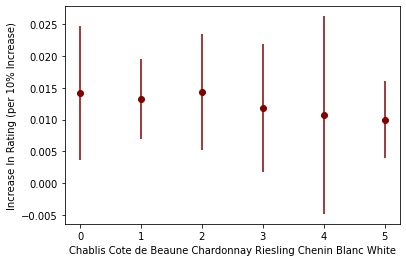

In [479]:
coef1 = regressor1.coef_[0].astype(float)*mean1*.1
coef2 = regressor2.coef_[0].astype(float)*mean2*.1
coef3 = regressor3.coef_[0].astype(float)*mean3*.1
coef4 = regressor4.coef_[0].astype(float)*mean4*.1
coef5 = regressor5.coef_[0].astype(float)*mean5*.1
coef6 = regressor6.coef_[0].astype(float)*mean6*.1

sd = [sd1*mean1*.1, sd2*mean2*.1, sd3*mean3*.1, sd4*mean4*.1, sd5*mean5*.1, sd6*mean6*.1]




print(f"Chablis rating increase in rating per 10% increase in price: {regressor1.coef_[0]*mean1*.1}")
print(f"Cote de Beaune rating increase in rating per 10% increase in price: {regressor2.coef_[0]*mean2*.1}")
print(f"Chardonnay rating increase in rating per 10% increase in price: {regressor3.coef_[0]*mean3*.1}")
print(f"Riesling rating increase in rating per 10% increase in price: {regressor4.coef_[0]*mean4*.1}")
print(f"Chenin Blanc rating increase in rating per 10% increase in price: {regressor5.coef_[0]*mean5*.1}")
print(f"White rating increase in rating per 10% increase in price: {regressor6.coef_[0]*mean6*.1}")


wine_names = ['Chablis','Cote de Beaune','Chardonnay','Riesling','Chenin Blanc','White']
x_pos = [i for i, _ in enumerate(wine_names)]
increase_percent = [coef1[0],coef2[0],coef3[0],coef4[0],coef5[0],coef6[0]]
x_pos = [i for i, _ in enumerate(wine_names)]

plt.errorbar(x_pos, increase_percent, sd, linestyle = 'None', marker = 'o', color = 'maroon')
plt.ylabel('Increase In Rating (per 10% Increase)')
plt.xlabel('Chablis Cote de Beaune Chardonnay Riesling Chenin Blanc White')
plt.show()



In this analysis, Chardonnay triumps as the most increase in rating while for every 10% increase in price

### Okay, I want to get a Chardonnay or a Riesling. Where should I get my wine from?

To find where I can find the best deals, I plot histograms of Wine Rating to Price Ratio by region



In [484]:
print(w3.Region.value_counts())
print(w4.Region.value_counts())


Californian      159
Australian        77
South African     69
Napa Valley       61
New Zealand       36
Argentinian       26
Oregon            13
Spanish           13
Chilean            9
Canadian           3
 Chilean           1
Name: Region, dtype: int64
German         235
Alsace         110
Austrian        25
Australian      12
New Zealand     10
Californian      2
Name: Region, dtype: int64


#### Chardonnay

In [489]:
r1 = w3.where(w3.Region == 'Californian')
r2 = w3.where(w3.Region == 'Australian')
r3 = w3.where(w3.Region == 'South African')
r4 = w3.where(w3.Region == 'Napa Valley')


figure, axes = plt.subplots(nrows=2, ncols=2)

weights = np.ones_like(r1.WineRatingPriceRatio) / len(r1.WineRatingPriceRatio)
axes[0,0].hist(r1.WineRatingPriceRatio, color = 'olivedrab', weights = weights)
axes[0,0].set_title('California')

weights = np.ones_like(r2.WineRatingPriceRatio) / len(r2.WineRatingPriceRatio)
axes[0,1].hist(r2.WineRatingPriceRatio, color = 'darkolivegreen', weights = weights)
axes[0,1].set_title('Australia')


weights = np.ones_like(r3.WineRatingPriceRatio) / len(r3.WineRatingPriceRatio)
axes[1,0].hist(r3.WineRatingPriceRatio, color = 'darkseagreen', weights = weights)
axes[1,0].set_title('South Africa')

weights = np.ones_like(w4.WineRatingPriceRatio) / len(w4.WineRatingPriceRatio)
axes[1,1].hist(w4.WineRatingPriceRatio, color = 'darkgreen', weights = weights)
axes[1,1].set_title('Napa Valley')



figure.tight_layout()

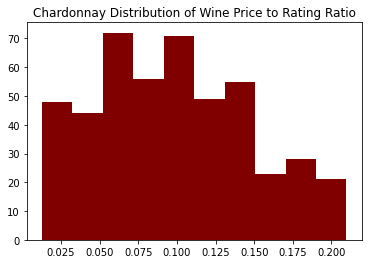

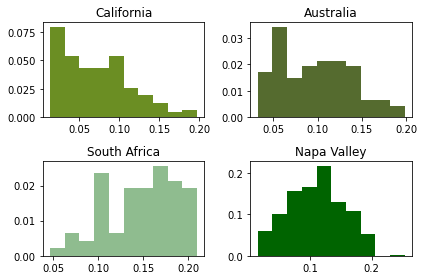

In [502]:
r1 = w3.where(w3.Region == 'Californian')
r2 = w3.where(w3.Region == 'Australian')
r3 = w3.where(w3.Region == 'South African')
r4 = w3.where(w3.Region == 'Napa Valley')

plt.hist(w3.VintageRatingPriceRatio, color = 'maroon')
plt.title('Chardonnay Distribution of Wine Price to Rating Ratio')
plt.show()


figure, axes = plt.subplots(nrows=2, ncols=2)

weights = np.ones_like(r1.WineRatingPriceRatio) / len(r1.WineRatingPriceRatio)
axes[0,0].hist(r1.WineRatingPriceRatio, color = 'olivedrab', weights = weights)
axes[0,0].set_title('California')

weights = np.ones_like(r2.WineRatingPriceRatio) / len(r2.WineRatingPriceRatio)
axes[0,1].hist(r2.WineRatingPriceRatio, color = 'darkolivegreen', weights = weights)
axes[0,1].set_title('Australia')


weights = np.ones_like(r3.WineRatingPriceRatio) / len(r3.WineRatingPriceRatio)
axes[1,0].hist(r3.WineRatingPriceRatio, color = 'darkseagreen', weights = weights)
axes[1,0].set_title('South Africa')

weights = np.ones_like(w4.WineRatingPriceRatio) / len(w4.WineRatingPriceRatio)
axes[1,1].hist(w4.WineRatingPriceRatio, color = 'darkgreen', weights = weights)
axes[1,1].set_title('Napa Valley')



figure.tight_layout()

Seeing these distributions, a South African Chardonnay is the best value wine, but a Napa Valley Chardonnay would catch my eye too. I would steer away from any California wines not listed as a "Napa Valley" one.

#### Riesling

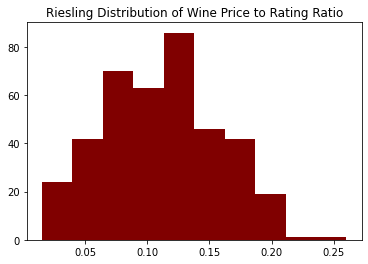

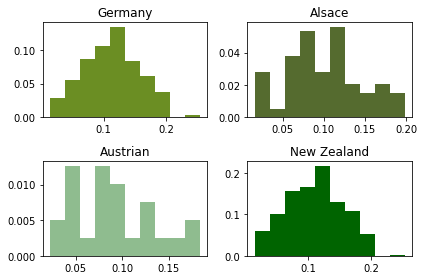

In [504]:
plt.hist(w4.VintageRatingPriceRatio, color = 'maroon')
plt.title('Riesling Distribution of Wine Price to Rating Ratio')
plt.show()
r1 = w4.where(w4.Region == 'German')
r2 = w4.where(w4.Region == 'Alsace')
r3 = w4.where(w4.Region == 'Austrian')
r4 = w4.where(w4.Region == 'New Zealand')


figure, axes = plt.subplots(nrows=2, ncols=2)

weights = np.ones_like(r1.WineRatingPriceRatio) / len(r1.WineRatingPriceRatio)
axes[0,0].hist(r1.WineRatingPriceRatio, color = 'olivedrab', weights = weights)
axes[0,0].set_title('Germany')

weights = np.ones_like(r2.WineRatingPriceRatio) / len(r2.WineRatingPriceRatio)
axes[0,1].hist(r2.WineRatingPriceRatio, color = 'darkolivegreen', weights = weights)
axes[0,1].set_title('Alsace')


weights = np.ones_like(r3.WineRatingPriceRatio) / len(r3.WineRatingPriceRatio)
axes[1,0].hist(r3.WineRatingPriceRatio, color = 'darkseagreen', weights = weights)
axes[1,0].set_title('Austrian')

weights = np.ones_like(r4.WineRatingPriceRatio) / len(r4.WineRatingPriceRatio)
axes[1,1].hist(w4.WineRatingPriceRatio, color = 'darkgreen', weights = weights)
axes[1,1].set_title('New Zealand')



figure.tight_layout()

Seeing this distribution for riesling wine, I would not be confident buying wine in any region that I would be getting a good price for my money-- if I were to purchase a wine, I would buy it from either Germany or New Zealand.

## I want to buy either a Napa Valley or South African Chardonnay. What price should I spend?


#### South Africa

In [517]:
r = w3.where(w3.Region == 'South African').dropna()


Y = r.WineRating.values.reshape(-1,1)
X = r.WinePrice.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=0)

X_train = X_train[np.logical_not(np.isnan(X_train))].reshape(-1,1)
X_test = X_test[np.logical_not(np.isnan(X_test))].reshape(-1,1)
y_train = y_train[np.logical_not(np.isnan(y_train))].reshape(-1,1)
y_test = y_test[np.logical_not(np.isnan(y_test))].reshape(-1,1)

model = sm.OLS(Y,X).fit()
sd = model.bse*10

#Find Regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

coef = regressor.coef_[0].astype(float)*10
print(f"\nSouth African Chardonnay: {regressor.coef_[0]*10} increase in rating per $10 increase in price")
print(f"\nSouth African Chardonnay Standard Error for Regression: {sd}")

mean = r.WinePrice.mean()
print(f"\nSouth African Chardonnay Average Cost: ${mean}")
rate = r.WineRating.mean()
print(f"\nSouth African Chardonnay Average Rating: {rate}")





South African Chardonnay: [0.08692901] increase in rating per $10 increase in price

South African Chardonnay Standard Error for Regression: [0.05425162]

South African Chardonnay Average Cost: $31.08601449275363

South African Chardonnay Average Rating: 4.152173913043478


#### Napa Valley

In [518]:
r = w3.where(w3.Region == 'Napa Valley').dropna()

Y = r.WineRating.values.reshape(-1,1)
X = r.WinePrice.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=0)

X_train = X_train[np.logical_not(np.isnan(X_train))].reshape(-1,1)
X_test = X_test[np.logical_not(np.isnan(X_test))].reshape(-1,1)
y_train = y_train[np.logical_not(np.isnan(y_train))].reshape(-1,1)
y_test = y_test[np.logical_not(np.isnan(y_test))].reshape(-1,1)

model = sm.OLS(Y,X).fit()
sd = model.bse*10

#Find Regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

coef = regressor.coef_[0].astype(float)*10
print(f"\nNapa Valley Chardonnay: {regressor.coef_[0]*10} increase in rating per $10 increase in price")
print(f"\nNapa Valley Chardonnay Standard Error for Regression: {sd}")
mean = r.WinePrice.mean()
print(f"\nNapa Valley Chardonnay Average Cost: ${mean}")
rate = r.WineRating.mean()
print(f"\nNapa Valley Chardonnay Average Rating: {rate}")




Napa Valley Chardonnay: [0.01939165] increase in rating per $10 increase in price

Napa Valley Chardonnay Standard Error for Regression: [0.0358458]

Napa Valley Chardonnay Average Cost: $69.70983606557373

Napa Valley Chardonnay Average Rating: 4.213114754098361


# We have a WINNER: South African Chardonnay

Now what? I am going to go purchase as South African Chardonnay. Not only is it sold at a lower price point, the averge rating is close to the famous Napa Valley Chardonnays and with every $10 increase in price, the quality increases at a much higher value than Napa Valley Chardonnays

COVID-19 still exists, I lost money in stocks today, and I am still jobless, but I know what wine I will purchase next.

# Good Deals by Region

### Total List:

In [580]:
r_c = wines.where((r.WineRatingPriceRatio >=.15) & (r.WineRating >= 4.0)).dropna()
r_c.to_csv('Wine_Recommendations.csv')

### Alsace

In [575]:
r = wines.where(wines.Region == 'Alsace')
r_c = r.where((r.WineRatingPriceRatio >=.15) & (r.WineRating >= 4.0)).dropna()
r_c

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
3361,Domaines Schlumberger Gewürztraminer Alsace Gr...,Domaines Schlumberger,Gewürztraminer Alsace Grand Cru 'Kessler',2015,Alsace,Gewürztraminer,4.2,78.0,4.1,835.0,23.45,23.45,0.179104,0.174840
3524,Domaines Schlumberger Riesling Alsace Grand Cr...,Domaines Schlumberger,Riesling Alsace Grand Cru 'Saering',2015,Alsace,Riesling,4.0,318.0,4.0,2301.0,24.00,24.00,0.166667,0.166667
3680,Bott-Geyl Gewürztraminer Alsace Grand Cru 'Son...,Bott-Geyl,Gewürztraminer Alsace Grand Cru 'Sonnenglanz',2010,Alsace,Gewürztraminer,4.3,139.0,4.2,581.0,26.26,26.26,0.163747,0.159939
3717,Pfaffenheim Cuvée Ancestrum Gewürztraminer 2012,Pfaffenheim,Cuvée Ancestrum Gewürztraminer,2012,Alsace,Gewürztraminer,4.3,49.0,4.4,168.0,24.00,24.00,0.179167,0.183333
3774,Marc Kreydenweiss Wiebelsberg Grand Cru 2014,Marc Kreydenweiss,Wiebelsberg Grand Cru,2014,Alsace,Riesling,4.2,183.0,4.1,1190.0,26.47,26.47,0.158670,0.154892
3799,Domaines Schlumberger Gewürztraminer Alsace Gr...,Domaines Schlumberger,Gewürztraminer Alsace Grand Cru 'Kessler',2014,Alsace,Gewürztraminer,4.2,118.0,4.1,835.0,25.00,25.00,0.168000,0.164000
3800,Domaine Zind Humbrecht Riesling Alsace Clos Hä...,Domaine Zind Humbrecht,Riesling Alsace Clos Häuserer,2016,Alsace,Riesling,4.2,116.0,4.2,1500.0,25.00,25.00,0.168000,0.168000
3830,Domaine Weinbach Clos des Capucins Cuvée Saint...,Domaine Weinbach,Clos des Capucins Cuvée Sainte Catherine Riesl...,2009,Alsace,Riesling,4.2,80.0,4.2,884.0,23.11,23.11,0.181740,0.181740
3875,Dopff au Moulin Gewürztraminer Grand Cru Brand...,Dopff au Moulin,Gewürztraminer Grand Cru Brand de Turckheim,2011,Alsace,Gewürztraminer,4.2,45.0,4.1,255.0,24.34,24.34,0.172555,0.168447
3899,Albert Boxler Gewürztraminer 2016,Albert Boxler,Gewürztraminer,2016,Alsace,Gewürztraminer,4.2,34.0,4.1,243.0,22.48,22.48,0.186833,0.182384


### Burgundy

In [567]:
r = wines.where(wines.Region == 'Burgundy')
r_c = r.where((r.WineRatingPriceRatio >=.15) & (r.WineRating >= 4.0)).dropna()
r_c

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
1788,Domaine Vignes du Maynes Pouilly-Fuissé 2014,Domaine Vignes du Maynes,Pouilly-Fuissé,2014,Burgundy,Macônnais White,4.1,34.0,4.1,114.0,27.305,27.305,0.150156,0.150156
2766,La Chablisienne Chablis 1er Cru 'Fourchaume' 2014,La Chablisienne,Chablis 1er Cru 'Fourchaume',2014,Burgundy,Chablis,4.1,654.0,4.0,3226.0,25.000,25.000,0.164000,0.160000
2777,J.M. Boillot Montagny 1er Cru 2014,J.M. Boillot,Montagny 1er Cru,2014,Burgundy,Côte Chalonnaise White,4.1,295.0,4.1,1735.0,24.975,24.975,0.164164,0.164164
2791,Vessigaud Pouilly-Fuissé Vieilles Vignes 2014,Vessigaud,Pouilly-Fuissé Vieilles Vignes,2014,Burgundy,Macônnais White,4.1,217.0,4.1,1314.0,23.000,23.000,0.178261,0.178261
2802,Thevenet Quintaine Cuvée E.J. Thevenet Viré-Cl...,Thevenet Quintaine,Cuvée E.J. Thevenet Viré-Clessé,2009,Burgundy,Macônnais White,4.1,191.0,4.2,2398.0,24.785,24.785,0.165423,0.169457
2947,Isabelle et Denis Pommier Chablis 1er Cru 'Côt...,Isabelle et Denis Pommier,Chablis 1er Cru 'Côte de Léchet',2014,Burgundy,Chablis,4.1,56.0,4.1,290.0,23.105,23.105,0.177451,0.177451
3148,Patrick Piuze Terroir de Chablis 2016,Patrick Piuze,Terroir de Chablis,2016,Burgundy,Chablis,4.0,94.0,4.0,561.0,20.165,20.165,0.198364,0.198364
3318,Domaine Gérard Thomas Saint-Aubin 'Champ Tiran...,Domaine Gérard Thomas,Saint-Aubin 'Champ Tirant',2015,Burgundy,Côte de Beaune White,4.3,43.0,4.0,220.0,21.950,21.950,0.195900,0.182232
3326,Domaine François Raquillet Mercurey La Brigadi...,Domaine François Raquillet,Mercurey La Brigadière Blanc,2017,Burgundy,Côte Chalonnaise White,4.3,51.0,4.2,243.0,26.490,26.490,0.162325,0.158550
3340,Domaine Michel Viré-Clessé 2016,Domaine Michel,Viré-Clessé,2016,Burgundy,Macônnais White,4.2,320.0,4.1,1706.0,20.420,20.420,0.205681,0.200784


### California

In [568]:
r = wines.where(wines.Region == 'Californian')
r_c = r.where((r.WineRatingPriceRatio >=.15) & (r.WineRating >= 4.0)).dropna()
r_c



,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
3438,Au Bon Climat Wild Boy Chardonnay 2017,Au Bon Climat,Wild Boy Chardonnay,2017,Californian,Chardonnay,4.1,148.0,4.1,809.0,23.76,23.76,0.172559,0.172559
3512,Au Bon Climat Chardonnay Santa Barbara County ...,Au Bon Climat,Chardonnay Santa Barbara County,2017,Californian,Chardonnay,4.0,557.0,4.0,4022.0,23.83,23.83,0.167856,0.167856
3784,Martha Stoumen Post Flirtation White 2018,Martha Stoumen,Post Flirtation White,2018,Californian,White Blend,4.2,155.0,4.1,247.0,27.00,27.00,0.155556,0.151852
3820,Au Bon Climat Wild Boy Chardonnay 2016,Au Bon Climat,Wild Boy Chardonnay,2016,Californian,Chardonnay,4.2,90.0,4.1,809.0,20.75,20.75,0.202410,0.197590
3958,Francis Ford Coppola Director's Cut Chardonnay...,Francis Ford Coppola,Director's Cut Chardonnay,2016,Californian,Chardonnay,4.1,433.0,4.0,2649.0,21.99,21.99,0.186448,0.181901
4011,Spottswoode Sauvignon Blanc 2016,Spottswoode,Sauvignon Blanc,2016,Californian,Sauvignon Blanc,4.1,181.0,4.1,1066.0,25.00,25.00,0.164000,0.164000
4378,Sandhi Santa Barbara County Chardonnay 2011,Sandhi,Santa Barbara County Chardonnay,2011,Californian,Chardonnay,4.0,101.0,4.0,3045.0,21.50,21.50,0.186047,0.186047
4436,Dirty & Rowdy Familiar Blanc 2015,Dirty & Rowdy,Familiar Blanc,2015,Californian,White Blend,4.0,64.0,4.0,206.0,22.00,22.00,0.181818,0.181818


### Northern Italy 

In [571]:
r = wines.where(wines.Region == 'Northern Italy')
r_c = r.where((r.WineRatingPriceRatio >=.15) & (r.WineRating >= 4.0)).dropna()
r_c



,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
2556,Ca' Lojera Lugana Riserva del Lupo 2013,Ca' Lojera,Lugana Riserva del Lupo,2013,Northern Italy,White,4.2,128.0,4.2,716.0,18.325,18.325,0.229195,0.229195
2780,Lis Neris Venezia Giulia Picol 2012,Lis Neris,Venezia Giulia Picol,2012,Northern Italy,White,4.1,288.0,4.0,1524.0,19.365,19.365,0.211722,0.206558
3265,Toros Franco Pinot Bianco 2017,Toros Franco,Pinot Bianco,2017,Northern Italy,Pinot Blanc,4.0,34.0,4.0,540.0,18.780,18.780,0.212993,0.212993
3320,Tramin Stoan 2017,Tramin,Stoan,2017,Northern Italy,White,4.3,223.0,4.2,2630.0,21.540,21.540,0.199629,0.194986
3325,Tramin Nussbaumer Gewürztraminer 2017,Tramin,Nussbaumer Gewürztraminer,2017,Northern Italy,Gewürztraminer,4.3,516.0,4.2,5306.0,24.100,24.100,0.178423,0.174274
3330,Cà dei Frati Brolettino Lugana 2017,Cà dei Frati,Brolettino Lugana,2017,Northern Italy,White,4.2,1314.0,4.1,9059.0,26.000,26.000,0.161538,0.157692
3333,Cà dei Frati Pratto Bianco (Pratto Benaco Bres...,Cà dei Frati,Pratto Bianco (Pratto Benaco Bresciano),2016,Northern Italy,White,4.2,553.0,4.2,2742.0,26.000,26.000,0.161538,0.161538
3336,Ottella Le Creete 2018,Ottella,Le Creete,2018,Northern Italy,White,4.2,447.0,4.1,3359.0,23.920,23.920,0.175585,0.171405
3342,Ottella Molceo Lugana Riserva 2015,Ottella,Molceo Lugana Riserva,2015,Northern Italy,White,4.2,270.0,4.1,889.0,25.820,25.820,0.162665,0.158792
3381,Ottella Back to Silence 2018,Ottella,Back to Silence,2018,Northern Italy,White,4.2,36.0,4.2,178.0,24.600,24.600,0.170732,0.170732


### Germany

In [573]:
r = wines.where(wines.Region == 'German')
r_c = r.where((r.WineRatingPriceRatio >=.15) & (r.WineRating >= 4.0)).dropna()
r_c



,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
2769,St. Urbans-Hof White Label Nik Weis Wiltinger ...,St. Urbans-Hof,White Label Nik Weis Wiltinger Alte Reben,2016,German,Riesling,4.1,491.0,4.0,1615.0,15.755,15.755,0.260235,0.253888
3369,Oliver Zeter Fumé Sauvignon Blanc 2018,Oliver Zeter,Fumé Sauvignon Blanc,2018,German,Sauvignon Blanc,4.2,60.0,4.0,830.0,23.950,23.950,0.175365,0.167015
3403,Markus Molitor Mosel Alte Reben Riesling 2015,Markus Molitor,Mosel Alte Reben Riesling,2015,German,Riesling,4.1,520.0,4.0,2069.0,25.240,25.240,0.162441,0.158479
3415,Dönnhoff Oberhäuser Leistenberg Riesling Kabin...,Dönnhoff,Oberhäuser Leistenberg Riesling Kabinett,2015,German,Riesling,4.1,247.0,4.0,2362.0,20.850,20.850,0.196643,0.191847
3419,Dr. Loosen Ürziger Würzgarten Riesling Spätles...,Dr. Loosen,Ürziger Würzgarten Riesling Spätlese,2017,German,Riesling,4.1,232.0,4.1,2030.0,26.950,26.950,0.152134,0.152134
3468,Leitz Rüdesheimer Magdalenenkreuz Riesling Spä...,Leitz,Rüdesheimer Magdalenenkreuz Riesling Spätlese,2015,German,Riesling,4.1,77.0,4.0,464.0,21.940,21.940,0.186873,0.182315
3469,Schloss Johannisberg Gelblack Riesling Feinher...,Schloss Johannisberg,Gelblack Riesling Feinherb,2018,German,Riesling,4.1,76.0,4.0,1001.0,21.800,21.800,0.188073,0.183486
3516,Heymann-Löwenstein Schieferterrassen 2015,Heymann-Löwenstein,Schieferterrassen,2015,German,Riesling,4.0,441.0,4.0,2194.0,24.490,24.490,0.163332,0.163332
3646,Joh. Jos. Prüm Graacher Himmelreich Riesling S...,Joh. Jos. Prüm,Graacher Himmelreich Riesling Spätlese,2010,German,Riesling,4.4,166.0,4.2,1222.0,24.000,24.000,0.183333,0.175000
3698,S.A. Prüm Wehlener Sonnenuhr Riesling Spätlese...,S.A. Prüm,Wehlener Sonnenuhr Riesling Spätlese,2009,German,Riesling,4.3,85.0,4.1,412.0,20.160,20.160,0.213294,0.203373


### South Africa

In [578]:
r = wines.where(wines.Region == 'South African')
r_c = r.where((r.WineRatingPriceRatio >=.15) & (r.WineRating >= 4.0)).dropna()
r_c



,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
2772,Rupert & Rothschild Baroness Nadine 2012,Rupert & Rothschild,Baroness Nadine,2012,South African,Chardonnay,4.1,410.0,4.1,3517.0,22.015,22.015,0.186237,0.186237
3321,Newton Johnson Family Vineyards Chardonnay 2016,Newton Johnson,Family Vineyards Chardonnay,2016,South African,Chardonnay,4.3,162.0,4.2,844.0,25.500,25.500,0.168627,0.164706
3323,Lismore Sauvignon Blanc 2017,Lismore,Sauvignon Blanc,2017,South African,Sauvignon Blanc,4.3,97.0,4.0,433.0,20.280,20.280,0.212032,0.197239
3327,Journey's End Destination Chardonnay 2017,Journey's End,Destination Chardonnay,2017,South African,Chardonnay,4.3,44.0,4.3,432.0,20.500,20.500,0.209756,0.209756
3334,Meerlust Chardonnay 2017,Meerlust,Chardonnay,2017,South African,Chardonnay,4.2,528.0,4.0,2948.0,23.990,23.990,0.175073,0.166736
3343,DeMorgenzon Reserve Chenin Blanc 2017,DeMorgenzon,Reserve Chenin Blanc,2017,South African,Chenin Blanc,4.2,245.0,4.2,1757.0,26.650,26.650,0.157598,0.157598
3344,Hamilton Russell Vineyards Chardonnay 2018,Hamilton Russell Vineyards,Chardonnay,2018,South African,Chardonnay,4.2,224.0,4.1,5375.0,27.150,27.150,0.154696,0.151013
3352,Kleine Zalze Family Reserve Chenin Blanc 2015,Kleine Zalze,Family Reserve Chenin Blanc,2015,South African,Chenin Blanc,4.2,144.0,4.2,456.0,24.990,24.990,0.168067,0.168067
3355,Bouchard Finlayson Missionvale Chardonnay 2016,Bouchard Finlayson,Missionvale Chardonnay,2016,South African,Chardonnay,4.2,113.0,4.0,640.0,22.500,22.500,0.186667,0.177778
3359,Lismore Chardonnay 2016,Lismore,Chardonnay,2016,South African,Chardonnay,4.2,98.0,4.2,639.0,23.410,23.410,0.179411,0.179411


### Upper Loire Valley 

In [574]:
r = wines.where(wines.Region == 'Upper Loire Valley')
r_c = r.where((r.WineRatingPriceRatio >=.15) & (r.WineRating >= 4.0)).dropna()
r_c



,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
1820,Henri Bourgeois Sancerre Les Baronnes Blanc 2016,Henri Bourgeois,Sancerre Les Baronnes Blanc,2016,Upper Loire Valley,White,4.0,805.0,4.0,5294.0,25.350,25.350,0.157791,0.157791
2512,Domaine Delaporte Sancerre Silex Blanc 2016,Domaine Delaporte,Sancerre Silex Blanc,2016,Upper Loire Valley,White,4.2,221.0,4.1,537.0,20.585,20.585,0.204032,0.199174
2904,Domaine Delaporte Sancerre Silex Blanc 2015,Domaine Delaporte,Sancerre Silex Blanc,2015,Upper Loire Valley,White,4.1,73.0,4.1,537.0,20.585,20.585,0.199174,0.199174
3068,Henri Bourgeois Grande Réserve Sancerre Blanc ...,Henri Bourgeois,Grande Réserve Sancerre Blanc,2015,Upper Loire Valley,White,4.0,516.0,4.0,4146.0,23.335,23.335,0.171416,0.171416
3072,Joseph Mellot La Chatellenie Sancerre 2017,Joseph Mellot,La Chatellenie Sancerre,2017,Upper Loire Valley,White,4.0,409.0,4.0,2908.0,21.990,21.990,0.181901,0.181901
3315,Jean-Paul Balland Sancerre Blanc Grande Cuvée ...,Jean-Paul Balland,Sancerre Blanc Grande Cuvée,2017,Upper Loire Valley,White,4.4,90.0,4.3,764.0,23.950,23.950,0.183716,0.179541
3317,Claude Riffault Les Chasseignes Sancerre Blanc...,Claude Riffault,Les Chasseignes Sancerre Blanc,2018,Upper Loire Valley,White,4.4,34.0,4.0,747.0,22.220,22.220,0.198020,0.180018
3357,Jean-Paul Balland Sancerre Blanc Grande Cuvée ...,Jean-Paul Balland,Sancerre Blanc Grande Cuvée,2016,Upper Loire Valley,White,4.2,105.0,4.3,764.0,25.600,25.600,0.164062,0.167969
3394,Pascal Jolivet Sancerre Blanc 2017,Pascal Jolivet,Sancerre Blanc,2017,Upper Loire Valley,White,4.1,1326.0,4.0,7767.0,22.950,22.950,0.178649,0.174292
3409,Pascal Jolivet Pouilly-Fumé 2018,Pascal Jolivet,Pouilly-Fumé,2018,Upper Loire Valley,White,4.1,388.0,4.0,4500.0,20.280,20.280,0.202170,0.197239
